In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
housing_data <- read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv")

Rows: 35768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Address, Province
dbl (7): Price, Number_Beds, Number_Baths, Population, Latitude, Longitude, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
num_beds<- housing_data|>
           select(City, Province, Number_Beds)|>
           group_by(City, Province)|>
           summarize(Number_Beds = sum(Number_Beds))
num_beds

`summarise()` has grouped output by 'City'. You can override using the
`.groups` argument.


City,Province,Number_Beds
<chr>,<chr>,<dbl>
Abbotsford,British Columbia,2904
Airdrie,Alberta,818
Barrie,Ontario,3604
Brantford,Ontario,2333
Burnaby,British Columbia,3376
Caledon,Ontario,5349
Calgary,Alberta,4218
Edmonton,Alberta,4104
Guelph,Ontario,1446


Now, we got the total number of beds showed up on the market, and we can thus visualize the amount comparisons.

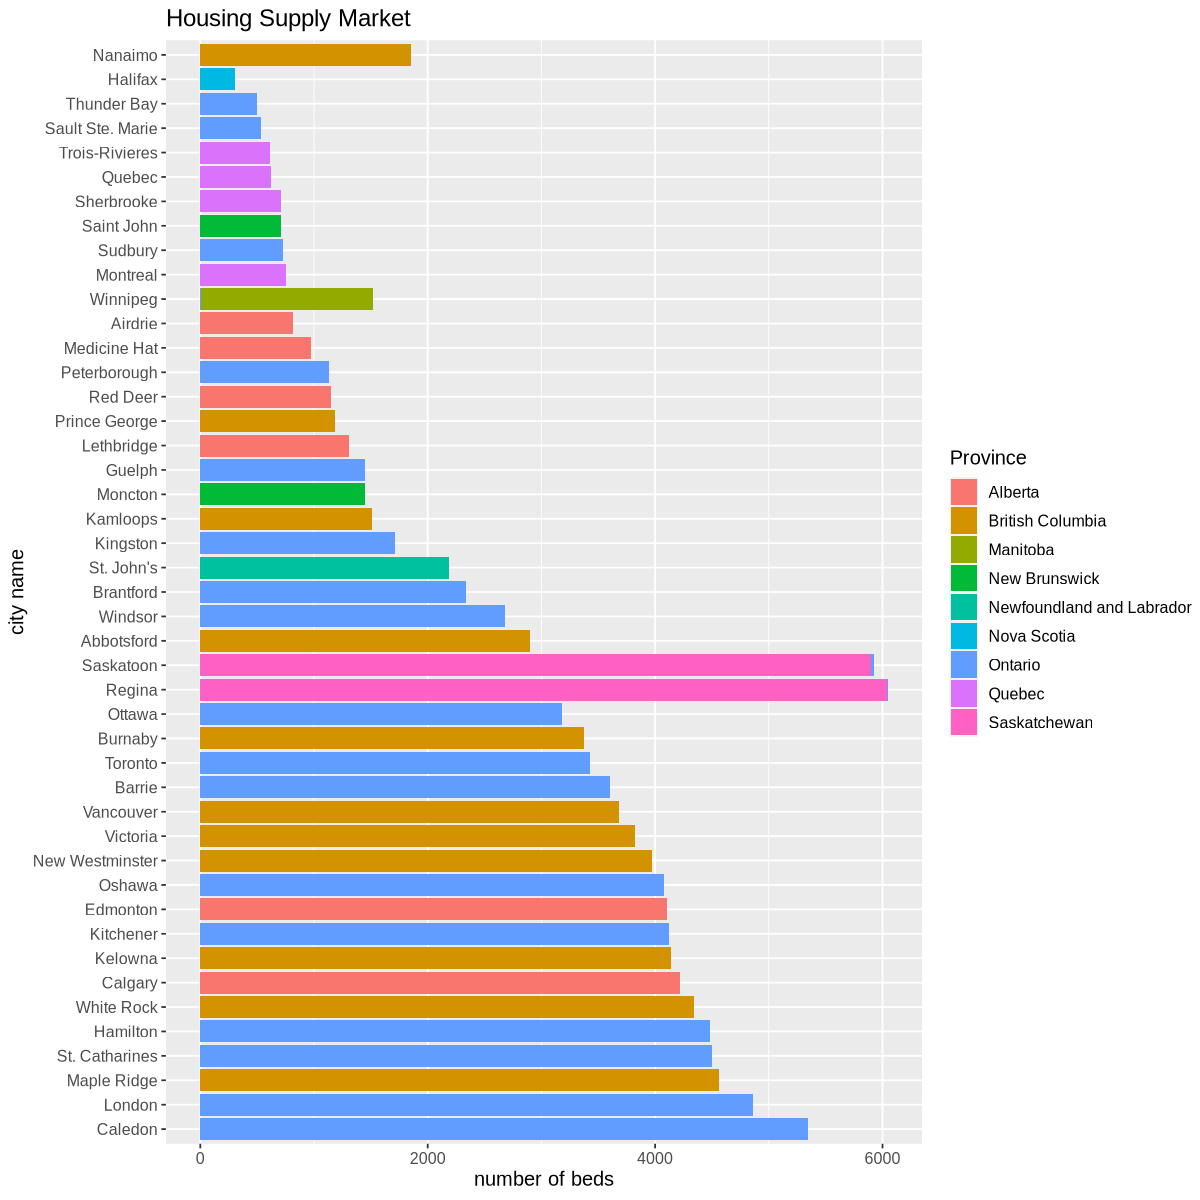

In [11]:
options(repr.plot.height = 10, repr.plot.width = 10)
beds_bar <- num_beds|>
            ggplot(aes(y = fct_reorder(City, Number_Beds, .desc = TRUE), x = Number_Beds, fill = Province))+
            geom_bar(stat = "identity")+
            labs(y = "city name", x = "number of beds")+
            ggtitle("Housing Supply Market")+
            theme(text = element_text(size = 12))
beds_bar

By this graph, we can see that regina has the most bedrooms available on market among the top five cities.